In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
#Adafair
from AdaFair import AdaFair 

from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#http://archive.ics.uci.edu/ml/datasets/credit+approval
#http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html
#https://www.kaggle.com/code/chandanabhatt/prediction-of-credit-approval
# Credit approval dataset
# $ Male          : num  1 1 0 0 0 0 1 0 0 0 ...
# $ Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
# $ Debt          : num  4.46 0.5 1.54 5.62 4 ...
# $ Married       : chr  "u" "u" "u" "u" ...
# $ BankCustomer  : chr  "g" "g" "g" "g" ...
# $ EducationLevel: chr  "q" "q" "w" "w" ...
# $ Ethnicity     : chr  "h" "h" "v" "v" ...
# $ YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
# $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
# $ Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
# $ CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
# $ DriversLicense: chr  "f" "f" "t" "f" ...
# $ Citizen       : chr  "g" "g" "g" "s" ...
# $ ZipCode       : chr  "00043" "00280" "00100" "00120" ...
# $ Income        : num  560 824 3 0 0 ...
# $ Approved      : chr  "+" "+" "+" "+" ...

def load_credit_approval():
    df = pd.read_csv('data/credit-approval.data',sep=",")
    protected_attribute = 'Male'
    majority_group_name = "Female"
    minority_group_name = "Male"
    class_label = 'Approved'
    filename = "credit-approval.Ada.abroca.pdf"
    
    df.head(5)
    #Remove missing value
    df = df[df['Male'] != '?']   
    #Label sex
    df['Male']=["Female" if v == "a" else "Male" for v in df['Male']]
    #Label class
    df['Approved']=[1 if v == "+" else -1 for v in df['Approved']]
    
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
#Credit card client
#Gender (1 = male; 2 = female)
def load_credit_card():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "credit-card.Ada.abroca.pdf"   
    
    #Label sex
    df['SEX']=["Female" if v == 2 else "Male" for v in df['SEX']]
    #Label class
    df['default payment']=[1 if v == 1 else -1 for v in df['default payment']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
#German credit
def load_german_credit():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "male"
    minority_group_name = "female"
    class_label = 'class-label'
    filename = "german-credit.Ada.abroca.pdf"    

    #Label class
    df['class-label']=[1 if v == 1 else -1 for v in df['class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_PAKDD2010():
    df = pd.read_csv('data/PAKDD.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'TARGET_LABEL_BAD'
    filename = "PAKDD.Ada.abroca.pdf"    
    
    #Remove ID
    df=df.drop(columns=['ID_CLIENT'])
    df =df.dropna()
    df=df.drop(columns = ['RESIDENCIAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3'])
    #Label class
    df['TARGET_LABEL_BAD']=[1 if v == 1 else -1 for v in df['TARGET_LABEL_BAD']]
    
    #Label sex
    df['SEX']=["Female" if v == "F" else "Male" for v in df['SEX']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
#Credit scoring data
#https://www.kaggle.com/code/islombekdavronov/credit-scoring
#FinTech companies in Central Asia.
def load_credit_scoring():
    df = pd.read_csv('data/credit_scoring.csv')    
    protected_attribute = 'Sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'label'
    filename = "credit-scoring.Ada.abroca.pdf"    
    
    df = df.replace({'-':0})
    df['Score_point']=df['Score_point'].astype(float)
    #Label sex
    df['Sex']=["Female" if v == 2 else "Male" for v in df['Sex']]

    #Label class
    df['label']=[1 if v == 1 else -1 for v in df['label']]
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,1:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Adafair model
    Ada = AdaFair(n_estimators=50, saIndex=sa_index, saValue=p_Group, CSB="CSB2", c=1, use_validation=False)
    Ada.fit(X_train,y_train)
    y_predicts = Ada.predict(X_test)
    y_pred_probs = Ada.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = Ada.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [8]:
#Main function
def run_eval(dataset):
    if dataset == 'credit-approval':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_approval()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'credit-card':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_card()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'german-credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'PAKDD':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_PAKDD2010()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'credit-scoring':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_scoring()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.8578947368421053, 'accuracy': 0.8529411764705882, 'fairness': 0.10160486995019369}
Equal opportunity
{'balanced_accuracy': 0.8578947368421053, 'accuracy': 0.8529411764705882, 'fairness': 0.02163461538461542, 'TPR_protected': 0.8846153846153846, 'TPR_non_protected': 0.90625, 'TNR_protected': 0.8717948717948718, 'TNR_non_protected': 0.7866666666666666}
Equalized odds
{'balanced_accuracy': 0.8578947368421053, 'accuracy': 0.8529411764705882, 'fairness': 0.1067628205128206, 'TPR_protected': 0.8846153846153846, 'TPR_non_protected': 0.90625, 'TNR_protected': 0.8717948717948718, 'TNR_non_protected': 0.7866666666666666}
Predictive parity
{'balanced_accuracy': 0.8578947368421053, 'accuracy': 0.8529411764705882, 'fairness': 0.037644787644787625, 'TPR_protected': 0.8846153846153846, 'TPR_non_protected': 0.90625, 'TNR_protected': 0.8717948717948718, 'TNR_non_protected': 0.7866666666666666}
Predictive equality
{'balanced_accuracy': 0.8578947368421053, 'acc

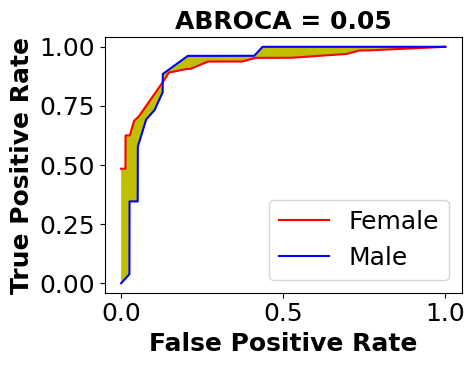

ABROCA: 0.05002864246931965


In [9]:
run_eval('credit-approval')

Statistical parity:
{'balanced_accuracy': 0.6460285250463822, 'accuracy': 0.816, 'fairness': 0.006198097408539216}
Equal opportunity
{'balanced_accuracy': 0.6460285250463822, 'accuracy': 0.816, 'fairness': 0.032117175683922805, 'TPR_protected': 0.35874439461883406, 'TPR_non_protected': 0.32662721893491126, 'TNR_protected': 0.9499180903346595, 'TNR_non_protected': 0.942898445970365}
Equalized odds
{'balanced_accuracy': 0.6460285250463822, 'accuracy': 0.816, 'fairness': 0.03913682004821728, 'TPR_protected': 0.35874439461883406, 'TPR_non_protected': 0.32662721893491126, 'TNR_protected': 0.9499180903346595, 'TNR_non_protected': 0.942898445970365}
Predictive parity
{'balanced_accuracy': 0.6460285250463822, 'accuracy': 0.816, 'fairness': 0.015521097584773047, 'TPR_protected': 0.35874439461883406, 'TPR_non_protected': 0.32662721893491126, 'TNR_protected': 0.9499180903346595, 'TNR_non_protected': 0.942898445970365}
Predictive equality
{'balanced_accuracy': 0.6460285250463822, 'accuracy': 0.816

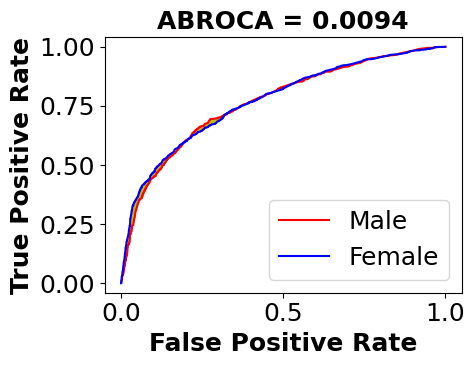

ABROCA: 0.00939543285910346


In [10]:
run_eval('credit-card')

Statistical parity:
{'balanced_accuracy': 0.555391976444608, 'accuracy': 0.7133333333333334, 'fairness': -0.044168096054888584}
Equal opportunity
{'balanced_accuracy': 0.555391976444608, 'accuracy': 0.7133333333333334, 'fairness': 0.03638418079096051, 'TPR_protected': 0.9830508474576272, 'TPR_non_protected': 0.9466666666666667, 'TNR_protected': 0.10344827586206896, 'TNR_non_protected': 0.1774193548387097}
Equalized odds
{'balanced_accuracy': 0.555391976444608, 'accuracy': 0.7133333333333334, 'fairness': 0.11035525976760123, 'TPR_protected': 0.9830508474576272, 'TPR_non_protected': 0.9466666666666667, 'TNR_protected': 0.10344827586206896, 'TNR_non_protected': 0.1774193548387097}
Predictive parity
{'balanced_accuracy': 0.555391976444608, 'accuracy': 0.7133333333333334, 'fairness': 0.04527510486059705, 'TPR_protected': 0.9830508474576272, 'TPR_non_protected': 0.9466666666666667, 'TNR_protected': 0.10344827586206896, 'TNR_non_protected': 0.1774193548387097}
Predictive equality
{'balanced_a

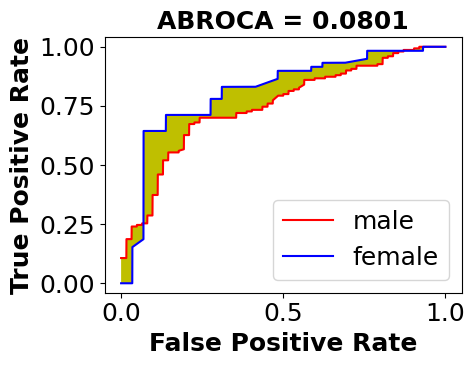

ABROCA: 0.08005721245742373


In [11]:
run_eval('german-credit')

Statistical parity:
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': 0.0}
Equal opportunity
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Predictive parity
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Predictive equality
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Treatment equality
{'balanced_accuracy': 0.5, 'accuracy': 0.7352815151255463, 'fairness': nan, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'T

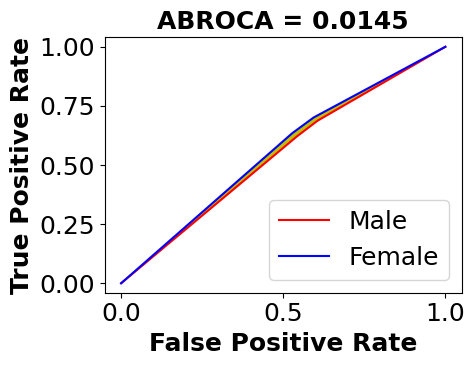

ABROCA: 0.014516607336631222


In [12]:
run_eval('PAKDD')

Statistical parity:
{'balanced_accuracy': 0.9929225956127923, 'accuracy': 0.9942900647126, 'fairness': 0.029752799230793103}
Equal opportunity
{'balanced_accuracy': 0.9929225956127923, 'accuracy': 0.9942900647126, 'fairness': 0.00010851455386862163, 'TPR_protected': 0.9946200403496974, 'TPR_non_protected': 0.9945115257958288, 'TNR_protected': 0.9877300613496932, 'TNR_non_protected': 1.0}
Equalized odds
{'balanced_accuracy': 0.9929225956127923, 'accuracy': 0.9942900647126, 'fairness': 0.01237845320417541, 'TPR_protected': 0.9946200403496974, 'TPR_non_protected': 0.9945115257958288, 'TNR_protected': 0.9877300613496932, 'TNR_non_protected': 1.0}
Predictive parity
{'balanced_accuracy': 0.9929225956127923, 'accuracy': 0.9942900647126, 'fairness': 0.0013504388926400823, 'TPR_protected': 0.9946200403496974, 'TPR_non_protected': 0.9945115257958288, 'TNR_protected': 0.9877300613496932, 'TNR_non_protected': 1.0}
Predictive equality
{'balanced_accuracy': 0.9929225956127923, 'accuracy': 0.99429006

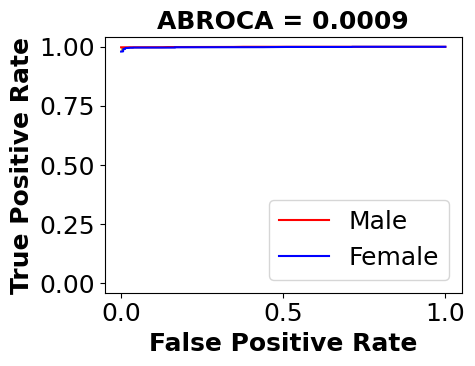

ABROCA: 0.0009449944279907679


In [13]:
run_eval('credit-scoring')